## Phase 3 Project Submission


Name : Edgar Kiprono

Student pace: DS-full time-Online

Submission Date : 8/03/2024

### Topic :  A study on H1N1 and Seasonal Flu Vaccines


1.Introduction

3.Business and Data Understanding

4.Middle

5.Modeling

6.Evaluation

7.Recommendations


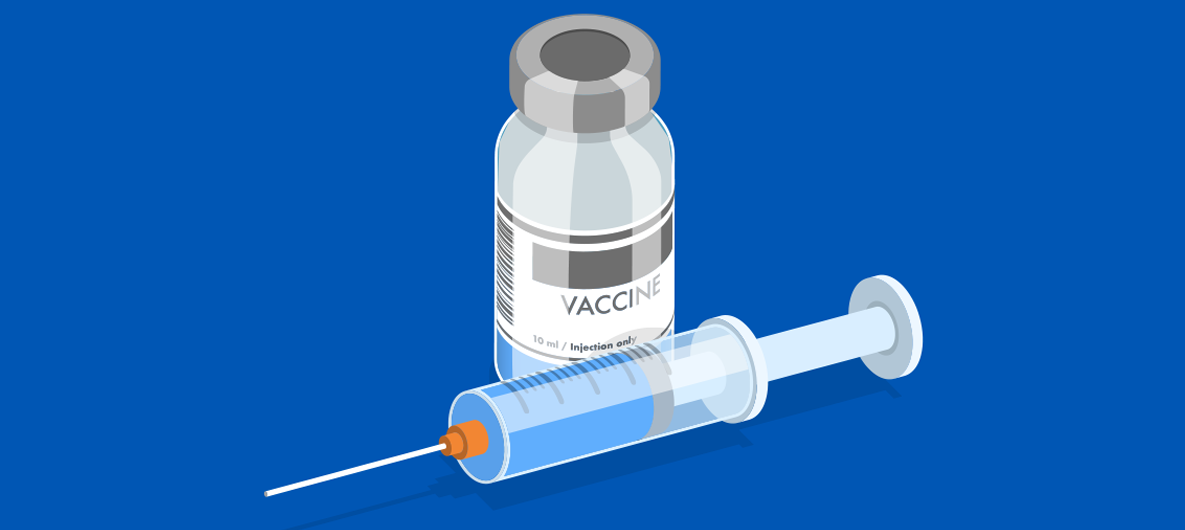
image COURTESY (https://www.aamc.org/news/new-covid-boosters-what-doctors-and-patients-need-know)

## Introduction


As the world grapples with the challenges posed by infectious diseases, the H1N1 flu and seasonal flu stand out as significant threats to public health. The H1N1 influenza virus, commonly known as swine flu, emerged as a global pandemic in 2009, causing widespread illness and mortality. It posed particular risks to young adults and individuals with underlying health conditions. In response, extensive vaccination campaigns were launched to mitigate the impact of the virus. Similarly, seasonal flu, caused by various strains of influenza viruses, presents recurring challenges to public health systems worldwide. Vaccination remains a cornerstone of preventive measures against both H1N1 and seasonal flu, offering protection to individuals and communities. Understanding the factors influencing vaccination uptake is crucial for devising effective public health strategies and ensuring the widespread adoption of vaccination measures.

## Business Understanding

The study aims to predict whether individuals received either the H1N1 flu vaccine or the seasonal flu vaccine based on data collected in the National 2009 H1N1 Flu Survey. This is valuable for guiding future public health efforts by understanding the factors influencing vaccination patterns. By identifying demographic, opinion, and health behavior factors associated with vaccination, stakeholders can tailor public health campaigns to increase vaccine uptake and mitigate the spread of infectious diseases.
Some of the potential stakeholders for this research include public health authorities such as World Health Organization (WHO), are key stakeholders and can use can use predictive models to inform vaccination strategies.
Healthcare Provider to uUnderstanding vaccination patterns can help healthcare providers target outreach efforts and improve patient educations: Academic researchers and public health institutions may use the insights gained from predictive modeling to conduct further studies on vaccine hesitancy, social determinants of health, and health behaviams.

### Business problem
Predict if an individual received H1n1 vaccine that will be of help to the stakeholders


### Data Understanding
#### Data source

The data utilized in this analysis was sourced from Data Driven, a reputable provider of datasets and analytics solutions. Through their comprehensive data offerings, we were able to access valuable insights into individuals' vaccination behaviors gleaned from the National 2009 H1N1 Flu Survey

Access the data through(https://www.drivendata.org/competitions/66/flu-shot-learning/)

Datasets include 

             1.training set features
             2.test set features
             3.training labels


In [224]:
#import the necessary libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore') 

#read csv file
#data = pd.read_csv("ds_salaries.csv",index_col=0)

## Data Understanding
#### Dataset

In [287]:
df = pd.read_csv("Data/training_set_features.csv")

In [288]:
df1= pd.read_csv("Data/training_set_labels.csv").set_index('respondent_id')


In [289]:
df2 = pd.merge(df,df1, on='respondent_id').set_index('respondent_id')


In [290]:
df2= df2.fillna(method='ffill')
df2.dropna(inplace=True)

In [291]:
columns_to_drop = ['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
                  'opinion_seas_sick_from_vacc','opinion_seas_sick_from_vacc','seasonal_vaccine','employment_industry','employment_occupation'] 
# List of columns to drop
df2.drop(columns=columns_to_drop, inplace=True)

In [292]:
df2['sex'] = df2['sex'].replace({'Female': 0, 'Male': 1})
df2['rent_or_own'] = df2['rent_or_own'].replace({'Rent': 0, 'Own': 1})
df2['marital_status'] = df2['marital_status'].replace({'Not Married': 0, 'Married': 1})
df2['sex'] = df2['sex'].astype(int)
df2['rent_or_own']=df2['rent_or_own'].astype(int)
df2['marital_status']=df2['marital_status'].astype(int)

In [329]:
# Assuming your DataFrame is called df3_train and df3_test
import pandas as pd

# Rename column in training set
df2.rename(columns={'education_< 12 Years': 'education_less_12_Years'}).head(1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,Below Poverty,0,0,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0


In [407]:
df2["h1n1_vaccine"].value_counts()

h1n1_vaccine
0    21032
1     5674
Name: count, dtype: int64

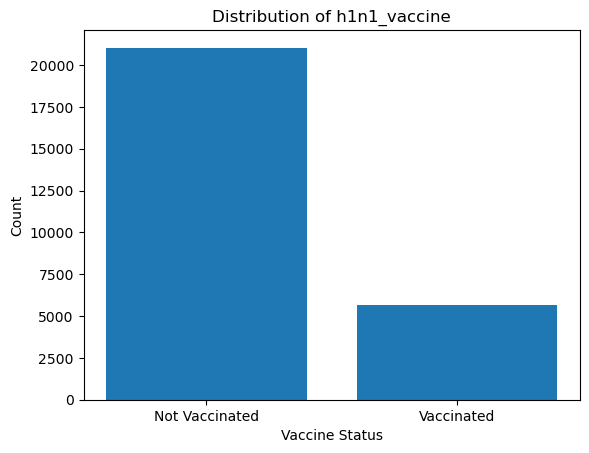

In [409]:
#graph of h1n1 vaccine administration
vaccine_counts = df2["h1n1_vaccine"].value_counts()
plt.bar(vaccine_counts.index, vaccine_counts.values)
plt.xlabel("Vaccine Status")
plt.ylabel("Count")
plt.title("Distribution of h1n1_vaccine")
plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'])
plt.show()


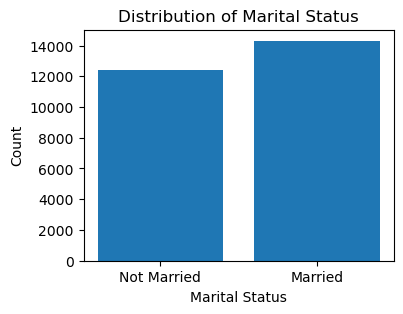

In [415]:
#graph of Marriage status vs vaccination
marital_counts = df2["marital_status"].value_counts()
plt.figure(figsize=(4, 3))
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status")
plt.xticks([0, 1], ['Not Married', 'Married'])
plt.show()



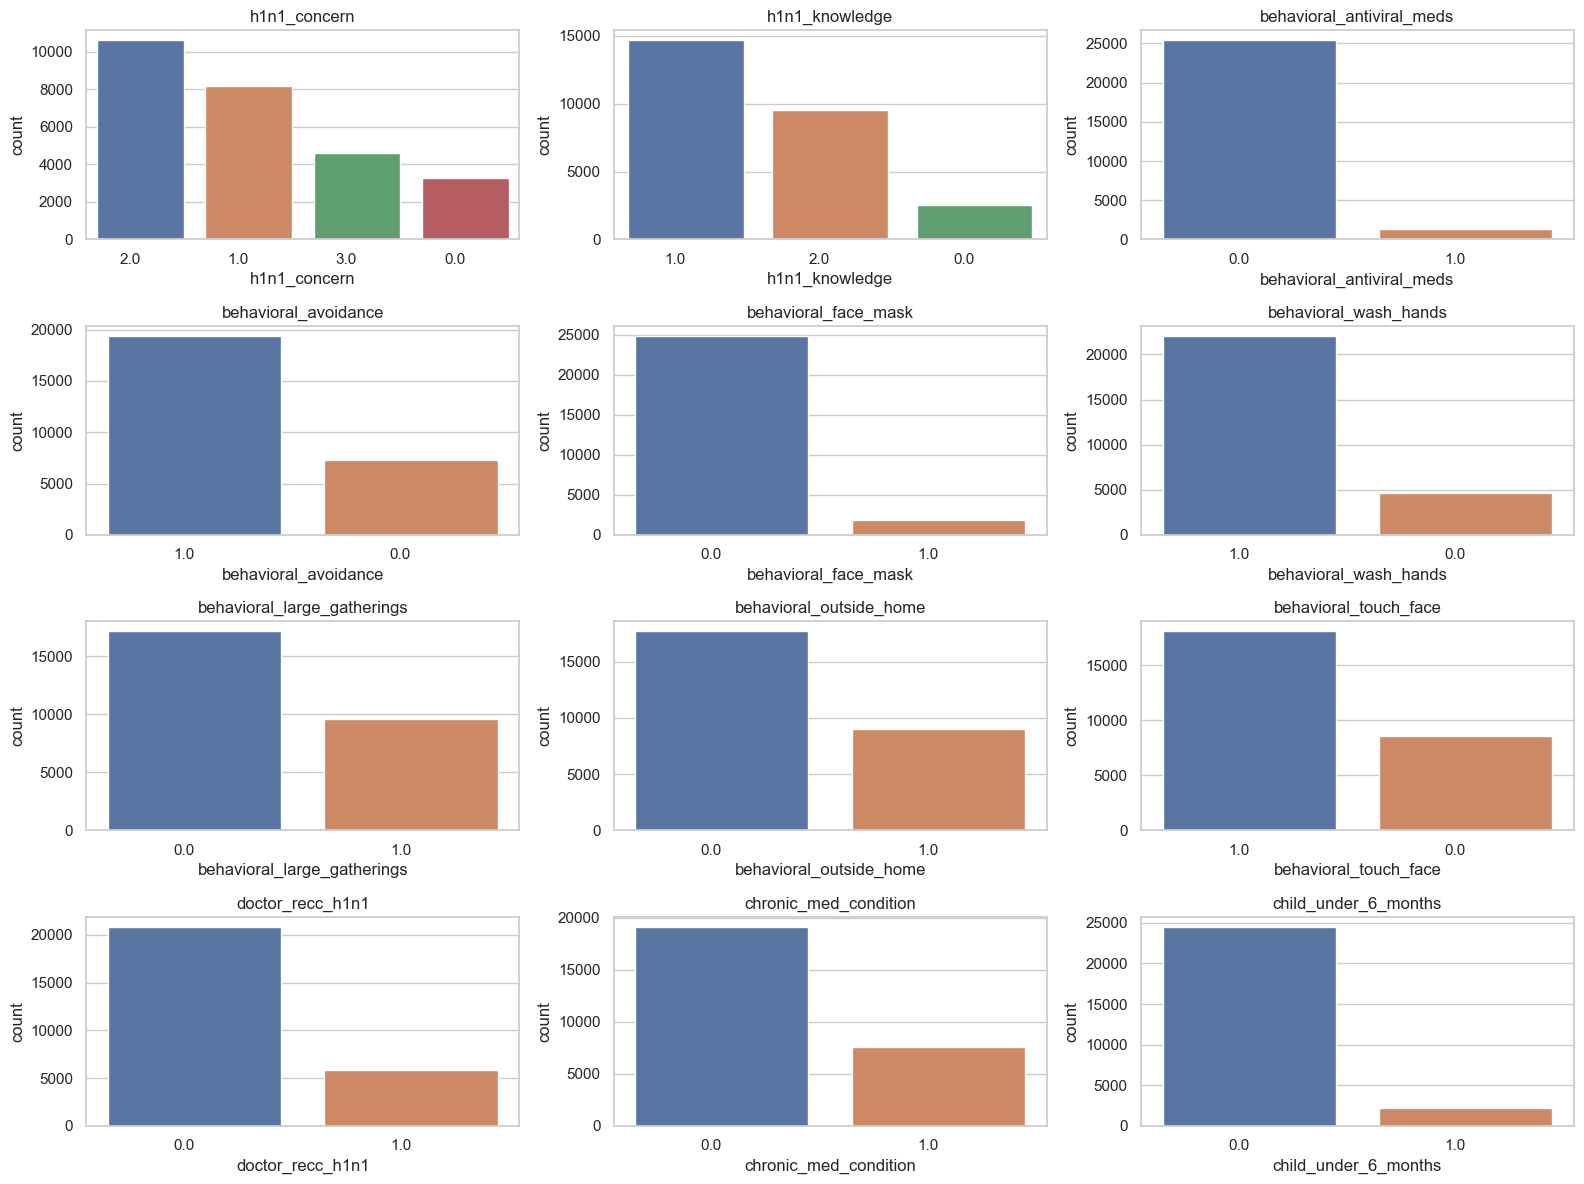

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(16, 12))
for i, column in enumerate(df2.columns[:12]):  # Limiting to the first 12 columns
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, data=df2,order=df2[column].value_counts().index)
    plt.title(column)
    plt.xticks(ha='right')

plt.tight_layout()
plt.show()


In [ ]:
X =df2.iloc[:,:-1]
y = df2[['h1n1_vaccine']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [331]:
X =df2.iloc[:,:-1]
y = df2[['h1n1_vaccine']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
df3_train = pd.get_dummies(X_train, drop_first=True)
df3_test = pd.get_dummies(X_test, drop_first=True)
df3_train = df3_train.astype(int)
df3_test = df3_test.astype(int)

In [332]:
# Training set
print('Train imbalance')
train_imb = y_train.value_counts()
print(train_imb)
print('--------------------------')
# Test set
# Training set
print('Test imbalance')
test_imb = y_test.value_counts()
print(test_imb)

Train imbalance
h1n1_vaccine
0               16800
1                4564
Name: count, dtype: int64
--------------------------
Test imbalance
h1n1_vaccine
0               4232
1               1110
Name: count, dtype: int64


In [333]:
from imblearn.over_sampling import RandomOverSampler
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Fit ROS to training data
X_train_resampled, y_train_resampled = ros.fit_resample(df3_train, y_train)


## Non parametric Models
### Decision Trees

In [345]:
#instantiate Decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

#predicting test data
y_pred = clf.predict(df3_test)

acc = accuracy_score(y_test,y_pred)
print(f'Decision tree Accuracy :{acc}')

# AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

Decision tree Accuracy :0.749906402096593
AUC Score: 0.6354625419370221


The reported accuracy of 0.7499 indicates that the decision tree classifier correctly predicted the class label for approximately 75% of the instances in the dataset.The AUC (Area Under the ROC Curve) score of 0.6354 suggests that the classifier is able to to distinguish between the positive and negative classes is slightly better than random guessing.

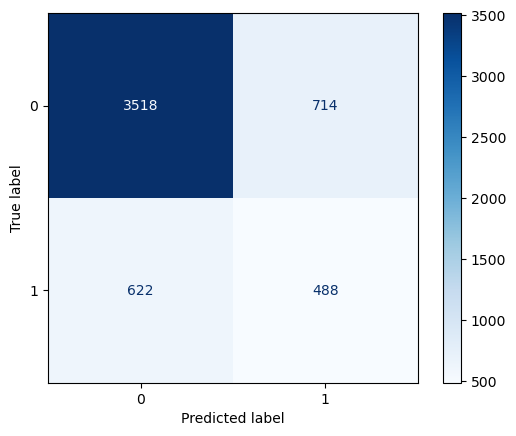

In [335]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

In this case, there are 3518 true negatives (correctly predicted as 0), 488 true positives (correctly predicted as 1), 714 false negatives (predicted as 0 but actually 1), and 622 false positives (predicted as 1 but actually 0).
Overall, the model appears to have more success in predicting class 0, as evidenced by the higher numbers in the first column. However, it struggles more with predicting class 1, as shown by the higher false negative count in the second column.

In [372]:
# # from sklearn.model_selection import GridSearchCV
# # from sklearn.tree import DecisionTreeClassifier

# # # Define the parameter grid
# rf_param_grid = {
#     "n_estimators": [10, 30, 100],
#     "criterion": ["gini", "entropy"],
#     "max_depth": [None, 2, 6, 10],
#     "min_samples_split": [5, 10],
#     "min_samples_leaf": [3, 6]
# }

# dt_grid_search = GridSearchCV(dt_clf, rf_param_grid, cv=5, return_train_score=True)

# # Fit to the data
# dt_grid_search.fit(X_train_resampled, y_train_resampled)
# # Mean training score
# dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# # Mean test score
# dt_gs_testing_score = dt_grid_search.score(df3_test, y_test)

# print(f"Mean Training Score: {dt_gs_training_score :.2%}")
# print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
# print("Best Parameter Combination Found During Grid Search:")

# dt_grid_search.best_params_


In [300]:
# estimator from the grid search
best_clf = grid_search.best_estimator_
# Prediction on the test data
y_pred_test = best_clf.predict(df3_test)
#  accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7457880943466866


### GridSearchCV
#### Tuning Decision Tree hyperparameters

In [355]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier(random_state=42)

#cross validation
dt_cv_score = cross_val_score(dt_clf, df3_train, y_train, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)
#mean cross validation for a 10 fold cross validation
mean_dt_cv_score

0.7412005611843409

The cross-validation score for a Decision Tree classifier on the training data is approximately 0.7477. This indicates that, on average, the model correctly classifies about 74.21% of the samples in the training data when evaluated using 10-fold cross-validation.

In [357]:
dt_clf.fit(df3_train, y_train)

# Prediction on the test data
y_pred_test = dt_clf.predict(df3_test)
#accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7450393111194309


The model performs 0.7450% on the test data.This means that the model correctly classifies about 74.50% of the samples in the test data.

In [368]:
#hyperparameters to tune
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(df3_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

dt_grid_search.best_params_

Mean Training Score: 77.22%
Mean Test Score: 75.80%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [384]:
# Define the preprocessing steps
# preprocessor = ColumnTransformer([
#     ( X_train_resampled.columns)  # Scaling numeric features
# ])

# # Define the Random Forest classifier
# forest = RandomForestClassifier(n_estimators=100, max_depth=10)

# # Create the pipeline
# pipeline = Pipeline([('classifier', forest)])

# # Fit the pipeline on the training data
# pipeline.fit(X_train_resampled, y_train_resampled)

# # Evaluate the model on the training set
# train_accuracy = pipeline.score(df3_train, y_train)
# print("Train Accuracy:", train_accuracy)

# # Evaluate the model on the test set
# test_accuracy = pipeline.score(df3_test, y_test)
# print("Test Accuracy:", test_accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)

# # Calculate and print the mean and standard deviation of the cross-validation scores
# print("Mean CV Score:", cv_scores.mean())


### KNN Model

In [301]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the training data
knn_clf.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier()

In [302]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
# Make predictions on the test data
y_pred_knn = knn_clf.predict(df3_test)

# Calculate the accuracy of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("Precision of KNN:", precision_knn)
print("Recall of KNN:", recall_knn)
print("F1-score of KNN:", f1_knn)


Accuracy of KNN: 0.7006739049045302
Precision of KNN: 0.367479674796748
Recall of KNN: 0.6108108108108108
F1-score of KNN: 0.4588832487309645


Accuracy: The model correctly classifies approximately 70.07% of the samples in the dataset.Precision: Of all the samples predicted as positive by the model, approximately 36.75% are actually positive.Recall: The model correctly identifies approximately 61.08% of all actual positive samples in the dataset
F1-score: The harmonic mean of precision and recall is approximately 45.89%.The KNN model demonstrates moderate accuracy in its predictions, with relatively low precision but higher recall. The F1-score reflects a relationship between precision and recall, suggesting a reasonable balance between the two metrics.

## Bagged trees

Bagged trees can be a non parametric on ensembling method

In [383]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base decision tree classifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5),
                               n_estimators=15,random_state = 42)
bagged_tree.fit(X_train_resampled, y_train_resampled)
bagged_tree.score(df3_train, y_train)

0.7875397865568246

In [382]:
bagged_tree.score(df3_test, y_test)

0.7766754024709847

The model has an accuracy of 0.7875% on the training data and 0.7768% on the test data
Increasing the maximum depth of decision trees in the ensemble allows the trees to grow deeper and capture more complex patterns in the data. This can lead to higher accuracy on the training data as the model becomes more expressive. However, deeper trees may also increase the risk of overfitting.
Reducing Max Depth: Conversely, reducing the maximum depth of decision trees limits their complexity, making them less prone to overfitting but also potentially less able to capture complex relationships in the data. This may lead to lower accuracy on the training data but could improve generalization performance on unseen data

### Random Forest

In [306]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,max_depth=10)
forest.fit(X_train_resampled, y_train_resampled)
rf_train_acc = forest.score(df3_train,y_train)
print(f"Train Accuracy: {rf_train_acc}")

Train Accuracy: 0.8320071147725145


In [307]:
# # Define the preprocessing steps
# preprocessor = ColumnTransformer([
#     ( X_train_resampled.columns)  # Scaling numeric features
# ])

# # Define the Random Forest classifier
# forest = RandomForestClassifier(n_estimators=100, max_depth=10)

# # Create the pipeline
# pipeline = Pipeline([('classifier', forest)])

# # Fit the pipeline on the training data
# pipeline.fit(X_train_resampled, y_train_resampled)

# # Evaluate the model on the training set
# train_accuracy = pipeline.score(df3_train, y_train)
# print("Train Accuracy:", train_accuracy)

# # Evaluate the model on the test set
# test_accuracy = pipeline.score(df3_test, y_test)
# print("Test Accuracy:", test_accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)

# # Calculate and print the mean and standard deviation of the cross-validation scores
# print("Mean CV Score:", cv_scores.mean())


Train Accuracy: 0.8280284590900581
Test Accuracy: 0.7849120179707975
Cross-Validation Scores: [0.79122024 0.79821429 0.79419643 0.79776786 0.79449405]
Mean CV Score: 0.7951785714285714


### Decision Tree Grid Search

In [308]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, df3_train, y_train, cv=20)
mean_dt_cv_score = np.mean(dt_cv_score)
mean_dt_cv_score

0.7470513501014284

In [309]:
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(df3_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

dt_grid_search.best_params_

Mean Training Score: 77.22%
Mean Test Score: 75.80%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Random Forest Grid Search

In [388]:
rf_clf =RandomForestClassifier(random_state = 42)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf,X_train_resampled, y_train_resampled, cv=10))

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)

Mean Cross Validation Score for Random Forest Classifier: 95.15%


Mean cross validation of a 5 cross fold on random forest provided an accuracy of 82.65% a great improvement from the baseline model which as 75%

#### Tuning the hyperparameters of the random forest model

In [312]:
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(df3_train, y_train)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")
print("------------------------------------------------------")
print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
------------------------------------------------------
Testing Accuracy: 82.70%


In [ ]:
The accuracy

In [313]:
dt_score = dt_grid_search.score(df3_test, y_test)
rf_score = rf_grid_search.score(df3_test, y_test)

print("Decision tree grid search: ", dt_score)
print("Random forest grid search: ", rf_score)

Decision tree grid search:  0.7579558217895919
Random forest grid search:  0.8375140396855111


## Ensembling Methods

### Adaboost and Gradient Boosting

In [314]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

adaboost_clf.fit(X_train_resampled, y_train_resampled)
gbt_clf.fit(X_train_resampled, y_train_resampled)
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(df3_train)
adaboost_test_preds = adaboost_clf.predict(df3_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(df3_train)
gbt_clf_test_preds = gbt_clf.predict(df3_test)

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc}")
    print(f"F1-Score: {f1}")
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7676933158584535
F1-Score: 0.5721920524092751

Model: Gradient Boosted Trees
Accuracy: 0.7710634712600637
F1-Score: 0.5796304254404813

Testing Metrics
Model: AdaBoost
Accuracy: 0.7652564582553351
F1-Score: 0.5627615062761506

Model: Gradient Boosted Trees
Accuracy: 0.7635716959940098
F1-Score: 0.5628245067497404


In [315]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[3281,  951],
       [ 303,  807]], dtype=int64)

In [316]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[3266,  966],
       [ 297,  813]], dtype=int64)

In [317]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4232
           1       0.46      0.73      0.56      1110

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.70      5342
weighted avg       0.82      0.77      0.78      5342



In [318]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      4232
           1       0.46      0.73      0.56      1110

    accuracy                           0.76      5342
   macro avg       0.69      0.75      0.70      5342
weighted avg       0.82      0.76      0.78      5342



## XGB Boost Model

In [395]:
import pandas as pd

# Assuming your DataFrame is called df3_train
for column_name in df3_train.columns:
    if '[' in column_name or ']' in column_name or '<' in column_name:
        print("Column name with forbidden characters:", column_name)


Column name with forbidden characters: education_< 12 Years


In [398]:
# Assuming your DataFrame is called df3_train and df3_test
import pandas as pd

# Rename column in training set
df3_train = df3_train.rename(columns={'education_< 12 Years': 'education_less_12_Years'})

# Rename column in test set (if needed)
df3_test = df3_test.rename(columns={'education_< 12 Years': 'education_less_12_Years'})


Renaming our df["education"] columns to remove (<) since XGB classifier does not support such marks on feature names

In [400]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(df3_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(df3_train)
test_preds = clf.predict(df3_test)

# Accuracy of training and test sets
XGB_train_accuracy = accuracy_score(y_train, training_preds)
XGB_test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(XGB_train_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(XGB_test_accuracy * 100))

Training Accuracy: 90.93%
Test Accuracy: 83.36%


The model gets an accuracy of almost 90% on the training data but works poorly on the test data. This could be as a sign of overfitting

### Tuning XGB Model with Grid Search

Tuning the model a little bit more to avoid overfitting

In [322]:
# defining parameter values for GridSearch
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}
#Instantsiating GridSearchCV
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(df3_train, y_train)

best_parameters = grid_clf.best_params_
#iterating throught thr param grid to fing the best optimal parameters
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#predicting our train and test df
training_preds = grid_clf.predict(df3_train)
test_preds = grid_clf.predict(df3_test)

#finding the accuracy score for train and test data
XGB_training_accuracy = accuracy_score(y_train, training_preds)
XGB_test_accuracy = accuracy_score(y_test, test_preds)

print('--------------------------------------------------')
print('Training Accuracy: {:.4}%'.format(XGB_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(XGB_test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7
--------------------------------------------------
Training Accuracy: 86.87%
Validation accuracy: 83.7%


After adjusting the hyperparameters the model seems to be working well on both the training and test data with an accuracy of 86.87% on the training data and 83.7% on the test data

### Conclusions

### Recommendations